# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

**Buy the book ** |
<a href='http://shop.oreilly.com/product/0636920032441.do' target='_blank'>O'Reilly</a> |
<a href='http://www.amazon.com/Yves-Hilpisch/e/B00JCYHHJM' target='_blank'>Amazon</a>

**All book codes & IPYNBs** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**The Python Quants GmbH** | <a href='http://tpq.io' target='_blank'>http://tpq.io</a>

**Contact us** | <a href='mailto:pff@tpq.io'>pff@tpq.io</a>

## Introduction

In [9]:
from pylab import plt
plt.style.use('ggplot')

import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Finance and Python Syntax

In [2]:
S0 = 100.
K = 105.
T = 1.0
r = 0.05
sigma = 0.2

In [3]:
from numpy import *

I = 100000

random.seed(1000)
z = random.standard_normal(I)
ST = S0 * exp(r * T + sigma * sqrt(T) * z)
hT = maximum(ST - K, 0)
C0 = exp(-r * T) * sum(hT) / I

In [4]:
print("Value of the European Call Option %5.3f" % C0)

Value of the European Call Option 9.149


## Time-to-Results

In [7]:
import numpy as np
import pandas as pd

# pip install pandas-datareader
from pandas_datareader import data as web


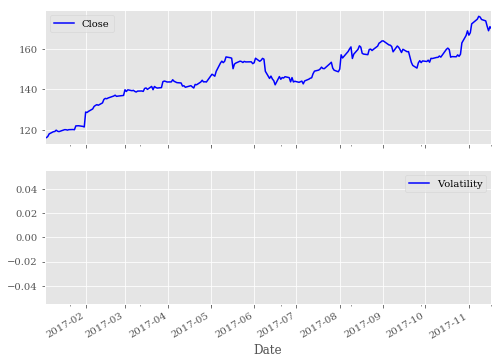

In [16]:
import datetime
import os

file='01_yahoo.pkl'
if os.path.exists(file):
    prices=pd.read_pickle(file)
else:       
    start = datetime.datetime(2017, 1, 1) # or start = '1/1/2016'
    end = datetime.date.today()
    prices = web.DataReader('AAPL', 'yahoo', start, end)
    prices.to_pickle(file)
prices.head()  # print first rows of the prices data


prices['Log_Ret'] = np.log(prices['Close'] / prices['Close'].shift(1))
prices['Volatility'] = prices['Log_Ret'].rolling(window=252).std() * np.sqrt(252)
prices.head()

%matplotlib inline
prices[['Close', 'Volatility']].plot(subplots=True, color='blue',
                                   figsize=(8, 6), grid=True);

In [10]:
# Need vpn to access google

# goog = web.DataReader('GOOG', data_source='google',
#                       start='3/14/2009', end='4/14/2014')
# goog.index.name = u'Date'
# goog.tail()

# goog['Log_Ret'] = np.log(goog['Close'] / goog['Close'].shift(1))
# goog['Volatility'] = goog['Log_Ret'].rolling(window=252).std() * np.sqrt(252)

# %matplotlib inline
# goog[['Close', 'Volatility']].plot(subplots=True, color='blue',
#                                    figsize=(8, 6), grid=True);
# tag: goog_vola
# title: Google closing prices and yearly volatility

## Paradigm

In [17]:
# 1) Python way, very slow
loops = 25000000
from math import *
a = range(1, loops)
def f(x):
    return 3 * log(x) + cos(x) ** 2
%timeit r = [f(x) for x in a]

16.3 s ± 313 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
# 2) numpy way
import numpy as np
a = np.arange(1, loops)
%timeit r = 3 * np.log(a) + np.cos(a) ** 2

935 ms ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
# 3) numexpr way
import numexpr as ne
ne.set_num_threads(1)
f = '3 * log(a) + cos(a) ** 2'
%timeit r = ne.evaluate(f)

4

653 ms ± 5.72 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
# 4) multi-thread numexpr way
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)

1

287 ms ± 6.64 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
